In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets:

In [39]:
raw_test_results = pd.read_csv("test_results.csv")
raw_user_table = pd.read_csv("user_table.csv")

Merge two dataset using user_id, and drop all samples with missing values.

In [40]:
raw_data = pd.merge(raw_test_results, raw_user_table, on='user_id')
raw_data = raw_data.dropna()
raw_data.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24


Remove timestamp and all other features that we won't test on.

In [41]:
raw_data = raw_data.drop(columns=["timestamp", "country", "test", 'user_id', 'lat', 'long'])
raw_data.head(2)

,source,device,operative_system,price,converted,city
0,ads_facebook,mobile,iOS,39,0,Buffalo
1,seo-google,mobile,android,39,0,Lakeville


This is the function to calculate TVD, our test statistic for A/B testing.

In [42]:
def getTestStatistic(data, feature):
    grouped = data.groupby([feature])['converted'].mean() # Calculate the overall mean conversion rate (as baseline)
    overall_mean = data['converted'].mean() # Compute TVD
    tvd = 0.5 * sum(abs(grouped - overall_mean))
    return tvd

Next, we are going to simulate test statistics under null hypothesis by shuffling labels to see the influence of device on test statistics.

In [43]:
def get_shuffled_tbale(table, cata_var, num_var_list):
    """Generate a new table with shuffled catagorical variable"""
    shuffled_column = table[cata_var].sample(frac=1, replace=False).reset_index(drop=True)
    new_table = pd.DataFrame({cata_var: shuffled_column,})
    for num_var in num_var_list:
        new_table[num_var] = table[num_var]
    return new_table    

In [44]:
def do_test(feature, size=1000):
    test_statistics_list = list()
    observed = getTestStatistic(raw_data, feature)  
    for i in range(size):
        test_statistics_list.append(float(getTestStatistic(get_shuffled_tbale(raw_data, feature, ["converted"]), feature)))

    fig, ax = plt.subplots(1)
    sns.histplot(test_statistics_list, bins=60, color="red", label='Simulated Statistics')
    ax.axvline(x=observed, linestyle='-.', color='black', label='measured statsitic')
    ax.legend()
    ax.set_xlabel(f'Test Statistic Values')  
    ax.set_ylabel(f'Frequency')
    ax.set_title(f'Distribution of Simulated Statistics on {feature}') 

    plt.show()
    p_value1 = (np.array(test_statistics_list) >= observed).sum() / len(test_statistics_list)
    print(f'{p_value1:.50f}')


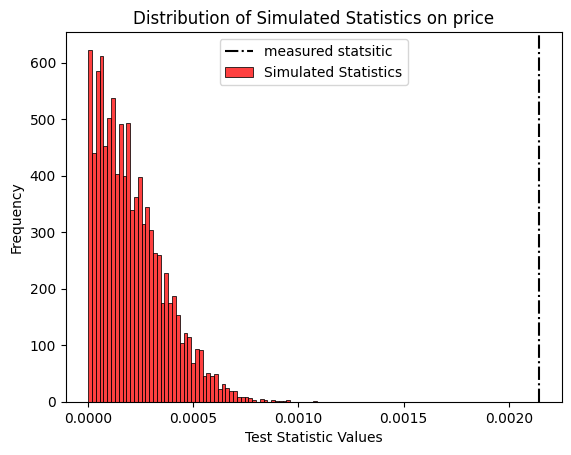

0.00000000000000000000000000000000000000000000000000


In [45]:
do_test("price", 10000) #Do A/B Testing on feature Price 

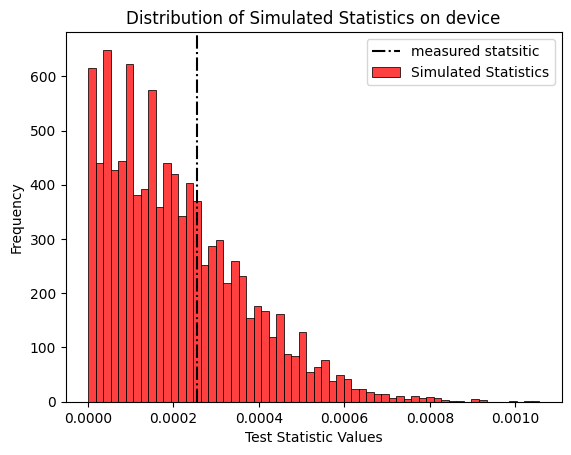

0.33300000000000001820765760385256726294755935668945


In [46]:
do_test("device", 10000) #Do A/B Testing on feature Device 

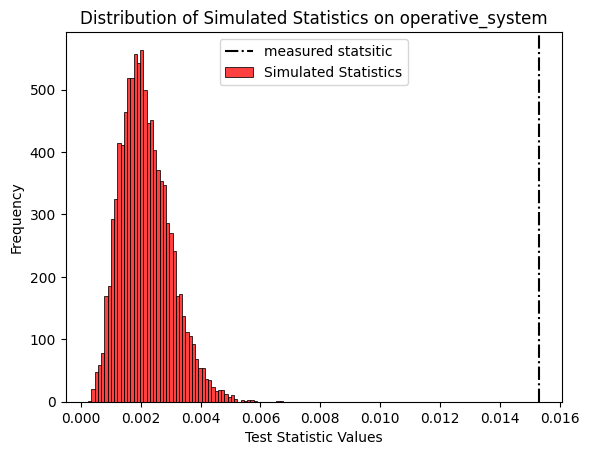

0.00000000000000000000000000000000000000000000000000


In [47]:
do_test("operative_system", 10000) #Do A/B Testing on feature Operative System 

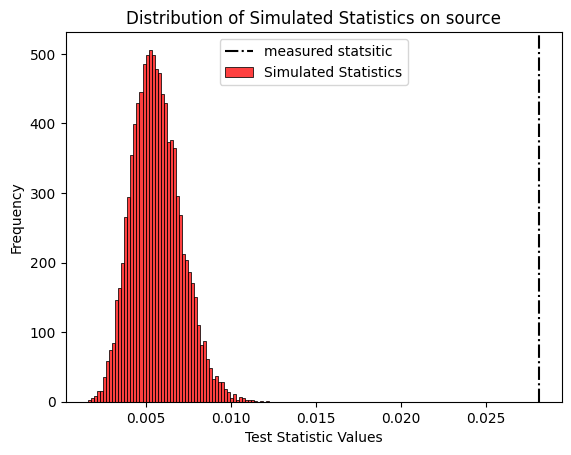

0.00000000000000000000000000000000000000000000000000


In [48]:
do_test("source", 10000) #Do A/B Testing on feature Source 

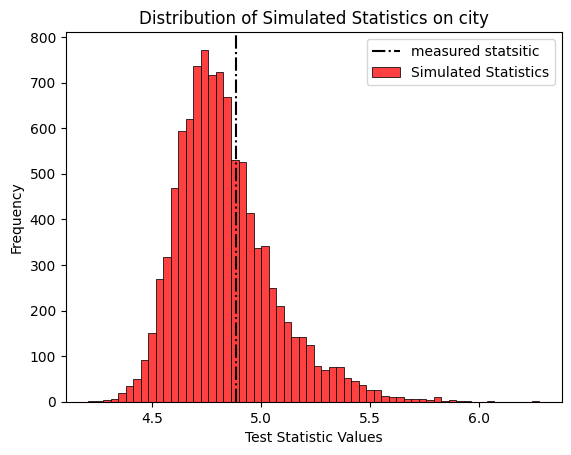

0.34160000000000001474376176702207885682582855224609


In [49]:
do_test("city", 10000) #Do A/B Testing on feature City 